In [1]:
import os

import chainer
from chainer import configuration
from chainer.dataset import convert
import chainer.links as L
import chainer.functions as F
from chainer import serializers

import math
import numpy as np
import cupy as cp
import random

import sklearn
from sklearn.utils import shuffle
import pickle

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import import_ipynb
import multi_mod_compact
from multi_mod_compact import num_models, directory, device
from multi_mod_compact import model1, model2, model3, model4, model5, model6

import pandas as pd

importing Jupyter notebook from multi_mod_compact.ipynb


## Training Results
Load the losses and accuracies for both the training and testing results.

In [14]:
for modndx in range(num_models):
    exec('training_accu{}=pickle.load(open(os.path.join(directory,"training_accu{}.pkl"),"rb"))'.format(modndx+1,modndx+1))
    exec('testing_accu{}=pickle.load(open(os.path.join(directory,"testing_accu{}.pkl"),"rb"))'.format(modndx+1,modndx+1))
    exec('training_loss{}=pickle.load(open(os.path.join(directory,"training_loss{}.pkl"),"rb"))'.format(modndx+1,modndx+1))
    exec('testing_loss{}=pickle.load(open(os.path.join(directory,"testing_loss{}.pkl"),"rb"))'.format(modndx+1,modndx+1)) 
print('last epoch:', len(training_accu1))

last epoch: 1100


Final epoch's training and testing accuracies.

In [15]:
print('MPL1 train_accu:{:.06f}'.format(float(training_accu1[len(training_accu1)-1])), '  MPL1 test_accu:{:.06f}'.format(float(testing_accu1[len(testing_accu1)-1])))
print('MPL2 train_accu:{:.06f}'.format(float(training_accu2[len(training_accu2)-1])), '  MPL2 test_accu:{:.06f}'.format(float(testing_accu2[len(testing_accu2)-1])))
print('MPL3 train_accu:{:.06f}'.format(float(training_accu3[len(training_accu3)-1])), '  MPL3 test_accu:{:.06f}'.format(float(testing_accu3[len(testing_accu3)-1])))
print('MPL4 train_accu:{:.06f}'.format(float(training_accu4[len(training_accu2)-1])), '  MPL4 test_accu:{:.06f}'.format(float(testing_accu4[len(testing_accu4)-1])))
print('MPL5 train_accu:{:.06f}'.format(float(training_accu5[len(training_accu2)-1])), '  MPL5 test_accu:{:.06f}'.format(float(testing_accu5[len(testing_accu5)-1])))
print('MPL6 train_accu:{:.06f}'.format(float(training_accu6[len(training_accu6)-1])), '  MPL6 test_accu:{:.06f}'.format(float(testing_accu6[len(testing_accu6)-1])))
#print('MPL7 train_accu:{:.06f}'.format(float(training7[len(training7)-1])), '  MPL7 test_accu:{:.06f}'.format(float(testing7[len(testing7)-1])))
#print('MPL8 train_accu:{:.06f}'.format(float(training8[len(training8)-1])), '  MPL8 test_accu:{:.06f}'.format(float(testing8[len(testing8)-1])))
#print('MPL9 train_accu:{:.06f}'.format(float(training9[len(training8)-1])), '  MPL9 test_accu:{:.06f}'.format(float(testing9[len(testing9)-1])))

MPL1 train_accu:0.998120   MPL1 test_accu:0.997776
MPL2 train_accu:0.998048   MPL2 test_accu:0.999281
MPL3 train_accu:0.998119   MPL3 test_accu:0.999305
MPL4 train_accu:0.998461   MPL4 test_accu:0.998966
MPL5 train_accu:0.998589   MPL5 test_accu:0.998230
MPL6 train_accu:0.998649   MPL6 test_accu:0.999100


The training performance of each model is shown below. The vertical axis is the accuracy, and the horizontal axis is the training epoch. The DNN models are described by the type of optimizers used and their architectures. The model descriptions are written above each plot.

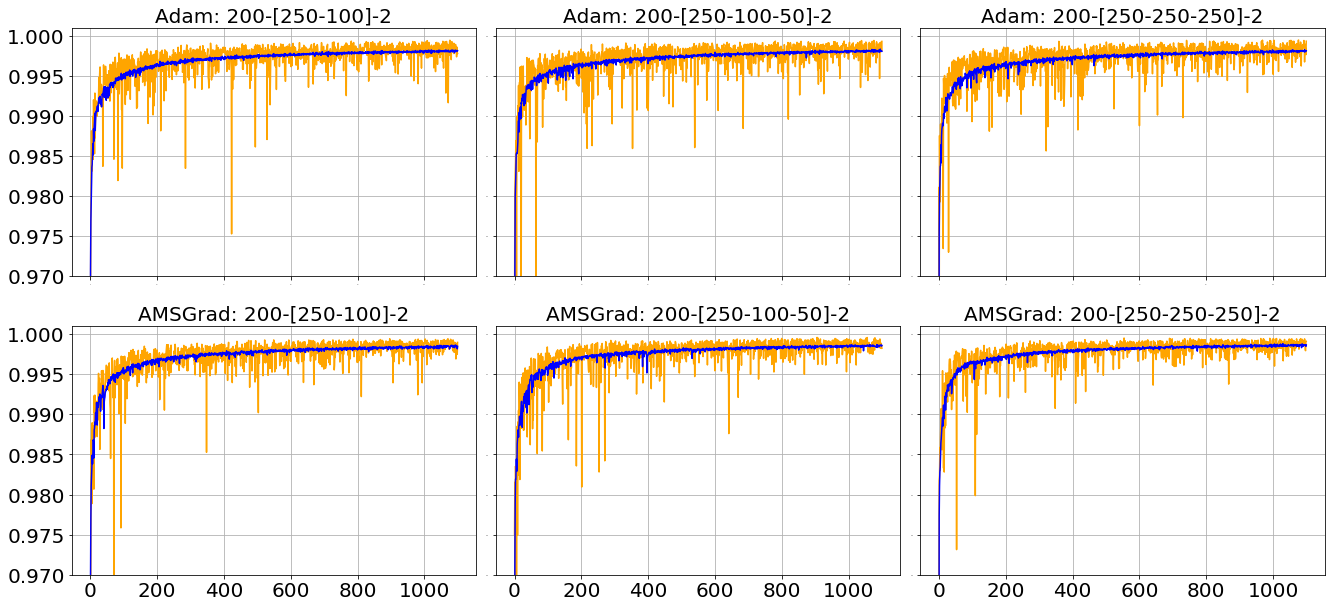

In [16]:
#%matplotlib qt
#%matplotlib inline

min_y = 0.97
max_y = 1.001
font_set_size = 20
font_set_size2 = 20
fig = plt.figure() #empty figure with nothing

#For Adam optimizer
plt.subplot(231).set_ylim(min_y,max_y)
test = plt.plot(testing_accu1,'orange')
train = plt.plot(training_accu1,'blue')
plt.title('Adam: 200-[250-100]-2',fontsize=font_set_size)
plt.yticks(fontsize=font_set_size)
plt.xticks(fontsize=0)
plt.grid(True)

plt.subplot(232).set_ylim(min_y,max_y)
test = plt.plot(testing_accu2,'orange')
train = plt.plot(training_accu2,'blue')
plt.title('Adam: 200-[250-100-50]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=0)
plt.grid(True)

plt.subplot(233).set_ylim(min_y,max_y)
test = plt.plot(testing_accu3,'orange')
train = plt.plot(training_accu3,'blue')
plt.title('Adam: 200-[250-250-250]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=0)
plt.grid(True)

#For AMSGrad Optimizer
plt.subplot(234).set_ylim(min_y,max_y)
test = plt.plot(testing_accu4,'orange')
train = plt.plot(training_accu4,'blue')
plt.title('AMSGrad: 200-[250-100]-2',fontsize=font_set_size)
plt.yticks(fontsize=font_set_size)
plt.xticks(fontsize=font_set_size2)
plt.grid(True)

plt.subplot(235).set_ylim(min_y,max_y)
test = plt.plot(testing_accu5,'orange')
train = plt.plot(training_accu5,'blue')
plt.title('AMSGrad: 200-[250-100-50]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=font_set_size2)
plt.grid(True)

plt.subplot(236).set_ylim(min_y,max_y)
test = plt.plot(testing_accu6,'orange')
train = plt.plot(training_accu6,'blue')
plt.title('AMSGrad: 200-[250-250-250]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=font_set_size2)
plt.grid(True)


#For CorrectedMomentumSGD Optimizer
#plt.subplot(337).set_ylim(min_y,max_y)
#test = plt.plot(testing7,'orange')
#train = plt.plot(training7,'blue')
#plt.title('CorrMomSGD: 200-[250-100]-3')
#plt.grid(True)

#plt.subplot(338).set_ylim(min_y,max_y)
#test = plt.plot(testing8,'orange')
#train = plt.plot(training8,'blue')
#plt.title('CorrMomSGD: 200-[250-100-50]-3')
#plt.grid(True)

#plt.subplot(339).set_ylim(min_y,max_y)
#test = plt.plot(testing9,'orange')
#train = plt.plot(training9,'blue')
#plt.title('CorrMomSGD: 200-[250-250-250]-3')
#plt.grid(True)


plt.subplots_adjust(top=2.00, bottom=0.1, left=0.10, right=3.00, 
                    hspace=0.2, wspace=0.05) #spaces in between 'aka:cross'

#fig.suptitle('Epoch:', len(training1))
#plt.tight_layout()
plt.show()

## Validation using separable potential
Load all trained models for evaluation.

In [17]:
#Load the pretrained models
for modndx in range(num_models):
    exec('serializers.load_npz(os.path.join(directory,"MLP{}.model"), model{})'.format(modndx+1,modndx+1))

label = ['bound', 'virtual', 'resonance']

#Set-up the scattering parameters
####################################
#Units in MeV
Nucleon = 938.9186795
Pion = 138.0394
Eta  = 547.862 

mu_NN   = 1/(1/Nucleon + 1/Nucleon)
mu_piN  = 1/(1/Pion + 1/Nucleon)
mu_etaN = 1/(1/Eta + 1/Nucleon)

    #Center-of-mass energy axis (in MeV)
Emax = 100.0 
E_Ndata = 200
Einput = np.linspace(Emax/E_Ndata, 
                     Emax, num=E_Ndata).astype(np.float32)

########################################
#Units in fm
#choose channel reduced mass
mu = mu_NN/197.3

#Relative momentum
def p_rel(E):
    return np.sqrt(2*mu*(E/197.3))

We will use two separable potential models for the validation.

In [18]:
#SEPARABLE POTENTIAL (ENERGY-INDEPENDENT) DATA GENERATION
def sep_eindep(LMDlow, LMDhig, info):
    #set info=0 if you do not want to see the number of samples in each classification
    #Generate cross-section and label for
    #separable potential with energy-independent 
    #coupling.
    #The arguments for lower bound cut-off and 
    #upper bound cut-off are in MeV
    SPdsigdOmeg = []
    SPlabel = []
    
    NBETA = 500
    BETADAT = np.random.uniform(low=LMDlow/197.3, 
                                high=LMDhig/197.3, 
                                size=NBETA)
    for indx0 in range(NBETA):
        #set cut-off parameter
        BETA = BETADAT[indx0]
        #set number of dataset based on the number 
        # of coupling parameters
        Nlmda = 200
        #value of coupling lambda that will give
        #zero-energy resonance
        zero_res = 2/(np.pi * mu * BETA)
        #absolute value of negative coupling lambda    
        abslmda1 = np.random.uniform(low=0.01*zero_res,
                                     high=0.99*zero_res,
                                     size=int(Nlmda/2))
        abslmda2 = np.random.uniform(low=1.01*zero_res,
                                     high=1.49*zero_res,
                                     size=int(Nlmda/2))
        abslmda = np.concatenate((abslmda1, abslmda2))
            #for each random lambda, we generate an amplitude
        for indx in range(Nlmda):
            lmda = -abslmda[indx]
            def T11(E):
                #Take the energy E in MeV
                p = np.sqrt(2*mu*(E/197.3))
                formfac = BETA**2/(p**2+BETA**2)
                SelfE   = np.pi*mu*BETA**3/(2*(p+(1j)*BETA)**2)
                tau11   = 1/(1/lmda-SelfE)
                return -np.pi*mu*p*formfac*tau11*formfac
            pnear=-(1j)*BETA +(1j)*BETA*np.sqrt(np.pi*mu*BETA*abslmda[indx]/2)
            if pnear.imag > 0:
                SPlabel.append(0)
            elif pnear.imag < 0:
                SPlabel.append(1)
            T11sqr = abs(T11(Einput)*np.conj(T11(Einput)))
            PWASP  = T11sqr/(p_rel(Einput)**2)
            SPdsigdOmeg.append(PWASP)      
    if info==1:
        labelz = [i for i, x in enumerate(range(len(SPlabel))) if SPlabel[x]==0]
        print('percentage of bound state:   ',len(labelz))
        labelz = [i for i, x in enumerate(range(len(SPlabel))) if SPlabel[x]==1]
        print('percentage of virtual state: ',len(labelz))
        labelz = [i for i, x in enumerate(range(len(SPlabel))) if SPlabel[x]==2]
        print('percentage of resonance:     ',len(labelz))  
    return SPdsigdOmeg, SPlabel  

In [19]:
#SEPARABLE POTENTIAL (ENERGY-DEPENDENT) DATA GENERATION
def sep_edepmneg(LMDlow, LMDhig, info):
    #set info=0 if you do not want to see the number of dat
    #Generate cross-section and label for
    #separable potential with energy-dependent 
    #coupling.
    #The arguments for lower bound cut-off and 
    #upper bound cut-off are in MeV
    #Initialize dsigma/dOmega for separable potential
    PWA_res = []
    PWA_label = []
    
    NLMDA = 10
    LMDA_DAT = np.random.uniform(low=LMDlow/197.3, 
                                 high=LMDhig/197.3,
                                 size=NLMDA)
    NRESM = 100
    Nlmda = 100
    
    for indx0 in range(NLMDA):
        #set cut-off parameter
        LMDA = LMDA_DAT[indx0]
        M0   = -(3-np.sqrt(8))*LMDA**2/(2*mu)

        #This range of mass is sufficient to give a variety of pole position
        RESM = np.random.uniform(low=0.41*M0,
                                 high=0.11*M0,
                                 size=NRESM)
        
        for indx1 in range(NRESM):
            Mres = RESM[indx1]
            eps  = 2*mu*Mres/LMDA**2
            
            zet_plus  = 0.5*((1+eps)/eps + np.sqrt((1+eps)**2/eps**2 + 4/eps))
            zet_minus = 0.5*((1+eps)/eps - np.sqrt((1+eps)**2/eps**2 + 4/eps))
            zet_vir   = (1+eps)/eps
            zet_bnd   = 0.5*((1+eps)/eps - np.sqrt((1+eps)**2/eps**2 - 4/eps))
        
            #starting from zero coupling
            lmdacrit0 = 4/(np.pi*LMDA**3)*zet_plus
            lmdacrit1 = 4/(np.pi*LMDA**3)*zet_minus
            lmdacrit2 = 4/(np.pi*LMDA**3)*zet_vir
            lmdacrit3 = 4/(np.pi*LMDA**3)*zet_bnd

            #equally distribute occurences
            #lmda_virwid1 = np.random.uniform(low=0.9*lmdacrit0,
            #                                high=0,
            #                                size=50)
        
            #lmda_resnnce = np.random.uniform(low=0.9*lmdacrit1,
            #                                high=1.1*lmdacrit0,
            #                                size=50)
    
            #lmda_virwid2 = np.random.uniform(low=0.9*lmdacrit2,
            #                                high=1.1*lmdacrit1,
            #                                size=3)

            lmda_vir    = np.random.uniform(low=1.00*lmdacrit3,
                                            high=1.00*lmdacrit2,
                                            size=50)

            lmda_bnd    = np.random.uniform(low=6.00*lmdacrit3,
                                            high=1.00*lmdacrit3,
                                            size=50)        
    
            #lmda_list = np.concatenate((lmda_virwid1, lmda_resnnce))
            #lmda_list = np.concatenate((lmda_virwid1, lmda_resnnce, lmda_virwid2))
            #lmda_list = np.concatenate((lmda_virwid1, lmda_resnnce, lmda_virwid2,
            #                           lmda_vir))
            #lmda_list = np.concatenate((lmda_virwid1, lmda_resnnce, lmda_virwid2,
            #                           lmda_vir,lmda_bnd))
            lmda_list = np.concatenate((lmda_vir, lmda_bnd))
            
            for indx2 in range (len(lmda_list)):
                lmda = lmda_list[indx2]
                def pwa_conj(E):
                    p = np.sqrt(2*mu*(E/197.3))
                    sbg = (p+(1j)*LMDA)**2/(p-(1j)*LMDA)**2
                    snum = 2*(p-(1j)*LMDA)**2-(lmda*np.pi*mu*LMDA**3)*(p**2/(2*mu)-(Mres))
                    sden = 2*(p+(1j)*LMDA)**2-(lmda*np.pi*mu*LMDA**3)*(p**2/(2*mu)-(Mres))
                    smatrix = sbg*snum/sden
                    fmatrix = (smatrix-1)/(2*(1j)*p)
                    return abs(fmatrix*np.conjugate(fmatrix))
                PWA_res.append(pwa_conj(Einput))
                
                coeff = [2-lmda*np.pi*LMDA**3/2,
                        4*(1j)*LMDA,
                        lmda*np.pi*mu*Mres*LMDA**3-2*LMDA**2]
                proot=np.roots(coeff)
            
                if abs(proot[1].real)<1e-10 and proot[1].imag*proot[0].imag > 0:
                        PWA_label.append(1) #label virtual state
                elif abs(proot[1].real)<1e-10 and proot[1].imag*proot[0].imag < 0:
                        PWA_label.append(0) #label bound state
                elif abs(proot[1].real)>1e-10 and (proot[1].imag)**2 > (proot[1].real)**2:
                        PWA_label.append(1) #label virtual state
                elif abs(proot[1].real)>1e-10 and (proot[1].imag)**2 < (proot[1].real)**2:
                        PWA_label.append(2) #label resonance
            
    if info==1:
        labelz = [i for i, x in enumerate(range(len(PWA_label))) if PWA_label[x]==0]
        print('percentage of bound state:   ',len(labelz))
        labelz = [i for i, x in enumerate(range(len(PWA_label))) if PWA_label[x]==1]
        print('percentage of virtual state: ',len(labelz))
        labelz = [i for i, x in enumerate(range(len(PWA_label))) if PWA_label[x]==2]
        print('percentage of resonance:     ',len(labelz))  
    return PWA_res, PWA_label             

The function below will calculate the accuracy of the model's prediction given the cross-section of separable model and the corresponding label. Specify in `goodmodel` the specific model that you want to test.

In [20]:
goodmodel = model6
def get_accuracy(SPdsigdOmeg, SPlabel):
    dataset = chainer.datasets.TupleDataset(SPdsigdOmeg, SPlabel)
    x, t = convert.concat_examples(dataset, device)
    goodmodel(x,t)
    accuracy = goodmodel.accuracy.array
    print('Accuracy:',accuracy)
    return accuracy + 0.0

Obtain accuracy of inferences in different cut-off parameter range. You can skip the codes below and load the files I already made.

In [ ]:
#Accuracy of inferences on energy-independent model
sep_accuracy = []
for ndx in range(14):
    LMDlow = (ndx+1.0)*100
    LMDhig = LMDlow + 100
    SPdsigdOmeg, SPlabel = sep_eindep(LMDlow, LMDhig, 0)
    print('Range of cut-off:', LMDlow,'-',LMDhig,'MeV')
    sep_accuracy.append(get_accuracy(SPdsigdOmeg, SPlabel))

In [ ]:
#transfer to CPU
cparraysep = cp.asarray(sep_accuracy)
sep_accuracy_mod6 = cp.asnumpy(cparraysep)

In [ ]:
#Accuracy of inferences on energey-dependent model
sep2_accuracy = []
for ndx in range(14):
    LMDlow = (ndx+1.0)*100
    LMDhig = LMDlow + 100
    PWA_res, PWA_label = sep_edepmneg(LMDlow, LMDhig, 0)
    print('Range of cut-off:', LMDlow,'-',LMDhig,'MeV')
    sep2_accuracy.append(get_accuracy(PWA_res, PWA_label))

In [ ]:
#transfer to CPU
cparraysep = cp.asarray(sep2_accuracy)
sep2_accuracy_mod6 = cp.asnumpy(cparraysep)

In [ ]:
#Use this if your want to save your results
#pickle.dump (sep_accuracy_mod1, open('sep_accuracy_mod1.pkl','wb'))
#pickle.dump (sep2_accuracy_mod1, open('sep2_accuracy_mod1.pkl','wb'))
#pickle.dump (sep_accuracy_mod2, open('sep_accuracy_mod2.pkl','wb'))
#pickle.dump (sep2_accuracy_mod2, open('sep2_accuracy_mod2.pkl','wb'))
#pickle.dump (sep_accuracy_mod3, open('sep_accuracy_mod3.pkl','wb'))
#pickle.dump (sep2_accuracy_mod3, open('sep2_accuracy_mod3.pkl','wb'))
#pickle.dump (sep_accuracy_mod4, open('sep_accuracy_mod4.pkl','wb'))
#pickle.dump (sep2_accuracy_mod4, open('sep2_accuracy_mod4.pkl','wb'))
#pickle.dump (sep_accuracy_mod5, open('sep_accuracy_mod5.pkl','wb'))
#pickle.dump (sep2_accuracy_mod5, open('sep2_accuracy_mod5.pkl','wb'))
#pickle.dump (sep_accuracy_mod6, open('sep_accuracy_mod6.pkl','wb'))
#pickle.dump (sep2_accuracy_mod6, open('sep2_accuracy_mod6.pkl','wb'))

Load the ready-made files here:

In [8]:
sep_accuracy_mod1 = pickle.load(open('sep_accuracy_mod1.pkl','rb'))
sep2_accuracy_mod1 = pickle.load(open('sep2_accuracy_mod1.pkl','rb'))
sep_accuracy_mod2 = pickle.load(open('sep_accuracy_mod2.pkl','rb'))
sep2_accuracy_mod2 = pickle.load(open('sep2_accuracy_mod2.pkl','rb'))
sep_accuracy_mod3 = pickle.load(open('sep_accuracy_mod3.pkl','rb'))
sep2_accuracy_mod3 = pickle.load(open('sep2_accuracy_mod3.pkl','rb'))
sep_accuracy_mod4 = pickle.load(open('sep_accuracy_mod4.pkl','rb'))
sep2_accuracy_mod4 = pickle.load(open('sep2_accuracy_mod4.pkl','rb'))
sep_accuracy_mod5 = pickle.load(open('sep_accuracy_mod5.pkl','rb'))
sep2_accuracy_mod5 = pickle.load(open('sep2_accuracy_mod5.pkl','rb'))
sep_accuracy_mod6 = pickle.load(open('sep_accuracy_mod6.pkl','rb'))
sep2_accuracy_mod6 = pickle.load(open('sep2_accuracy_mod6.pkl','rb'))

Plot the results. Note: each line containes 100,000 input-output data from two separable potential models.
The blue lines are for energy-independent model and the red lines are for energy-dependent model.

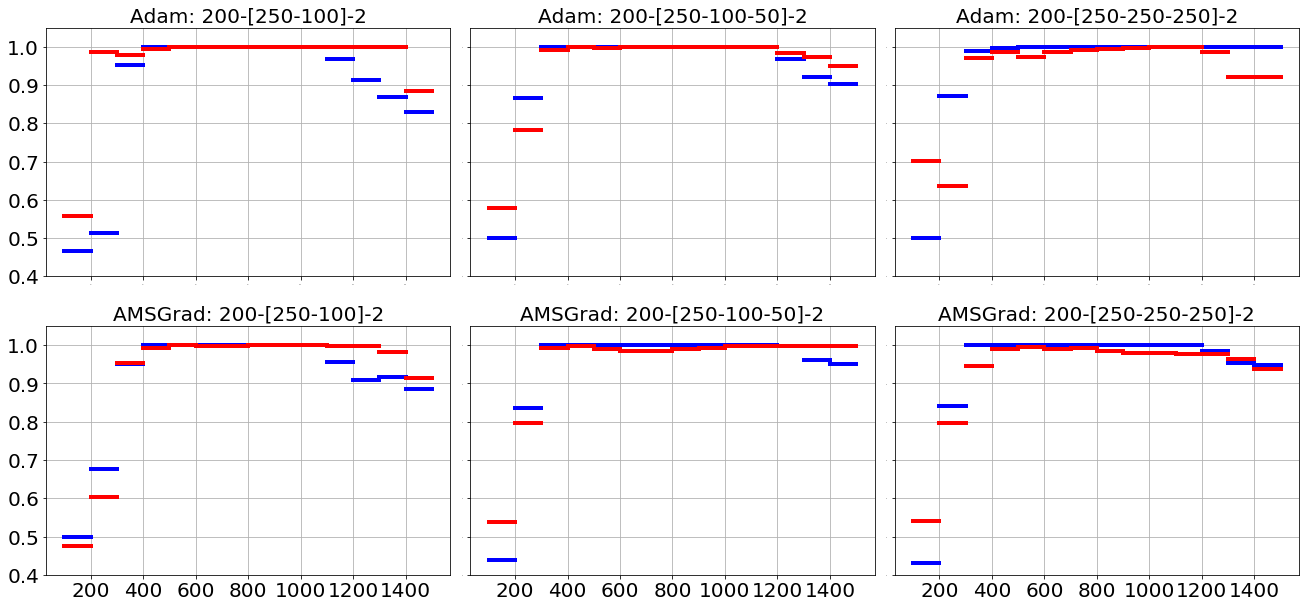

In [21]:
min_y = 0.4
max_y = 1.05

linethick = 4
#font_set_size = 24
#font_set_size2 = 20
fig = plt.figure() #empty figure with nothing

#For Adam optimizer
plt.subplot(231).set_ylim(min_y,max_y)
for n in range(len(sep_accuracy_mod1)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep_accuracy_mod1[n]
    plt.plot(x,y,color="b",linewidth=linethick)
for n in range(len(sep2_accuracy_mod1)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep2_accuracy_mod1[n]
    plt.plot(x,y,color="r",linewidth=linethick)
plt.title('Adam: 200-[250-100]-2',fontsize=font_set_size)
plt.yticks(fontsize=font_set_size)
plt.xticks(fontsize=0)
plt.grid(True)

plt.subplot(232).set_ylim(min_y,max_y)
for n in range(len(sep_accuracy_mod2)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep_accuracy_mod2[n]
    plt.plot(x,y,color="b",linewidth=linethick)
for n in range(len(sep2_accuracy_mod2)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep2_accuracy_mod2[n]
    plt.plot(x,y,color="r",linewidth=linethick)
plt.title('Adam: 200-[250-100-50]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=0)
plt.grid(True)

plt.subplot(233).set_ylim(min_y,max_y)
for n in range(len(sep_accuracy_mod3)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep_accuracy_mod3[n]
    plt.plot(x,y,color="b",linewidth=linethick)
for n in range(len(sep2_accuracy_mod3)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep2_accuracy_mod3[n]
    plt.plot(x,y,color="r",linewidth=linethick)
plt.title('Adam: 200-[250-250-250]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=0)
plt.grid(True)

plt.subplot(234).set_ylim(min_y,max_y)
for n in range(len(sep_accuracy_mod4)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep_accuracy_mod4[n]
    plt.plot(x,y,color="b",linewidth=linethick)
for n in range(len(sep2_accuracy_mod4)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep2_accuracy_mod4[n]
    plt.plot(x,y,color="r",linewidth=linethick)
plt.title('AMSGrad: 200-[250-100]-2',fontsize=font_set_size)
plt.yticks(fontsize=font_set_size)
plt.xticks(fontsize=font_set_size2)
plt.grid(True)

plt.subplot(235).set_ylim(min_y,max_y)
for n in range(len(sep_accuracy_mod5)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep_accuracy_mod5[n]
    plt.plot(x,y,color="b",linewidth=linethick)
for n in range(len(sep2_accuracy_mod5)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep2_accuracy_mod5[n]
    plt.plot(x,y,color="r",linewidth=linethick)
plt.title('AMSGrad: 200-[250-100-50]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=font_set_size2)
plt.grid(True)

plt.subplot(236).set_ylim(min_y,max_y)
for n in range(len(sep_accuracy_mod6)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep_accuracy_mod6[n]
    plt.plot(x,y,color="b",linewidth=linethick)
for n in range(len(sep2_accuracy_mod6)):
    x = np.linspace(100*(n+1),100*(n+2),10)
    y = np.ones(len(x))*sep2_accuracy_mod6[n]
    plt.plot(x,y,color="r",linewidth=linethick)
plt.title('AMSGrad: 200-[250-250-250]-2',fontsize=font_set_size)
plt.yticks(fontsize=0)
plt.xticks(fontsize=font_set_size2)
plt.grid(True)

plt.subplots_adjust(top=2.00, bottom=0.1, left=0.10, right=3.00, 
                    hspace=0.2, wspace=0.05) #spaces in between 'aka:cross'

#fig.suptitle('Epoch:', len(training1))
#plt.tight_layout()
plt.show()

### Evaluation of NN Online Models

In [22]:
#Load the NN online models
df_1s0 = pd.read_excel('NN_1S0.xlsx', sheet_name='Sheet1')
df_3s1 = pd.read_excel('NN_3S1.xlsx', sheet_name='Sheet1')

In [23]:
#Set the chosen neural network model to predictor mode
goodmodel = model6.predictor
goodmodel.to_device(device)

In [24]:
#convert phaseshifts unit from degree to radian

pwa93_1s0 = df_1s0["delta_pwa93"].tolist()
pwa93_1s0 = np.asarray(pwa93_1s0, dtype=np.float32)
delta_pwa93_1s0 = pwa93_1s0*np.pi/180

esc96_1s0 = df_1s0["delta_esc96"].tolist()
esc96_1s0 = np.asarray(esc96_1s0, dtype=np.float32)
delta_esc96_1s0 = esc96_1s0*np.pi/180

nijm1_1s0 = df_1s0["delta_nijm1"].tolist()
nijm1_1s0 = np.asarray(nijm1_1s0, dtype=np.float32)
delta_nijm1_1s0 = nijm1_1s0*np.pi/180

nijm2_1s0 = df_1s0["delta_nijm2"].tolist()
nijm2_1s0 = np.asarray(nijm2_1s0, dtype=np.float32)
delta_nijm2_1s0 = nijm2_1s0*np.pi/180

nijm93_1s0 = df_1s0["delta_nijm93"].tolist()
nijm93_1s0 = np.asarray(nijm93_1s0, dtype=np.float32)
delta_nijm93_1s0 = nijm93_1s0*np.pi/180

reid93_1s0 = df_1s0["delta_reid93"].tolist()
reid93_1s0 = np.asarray(reid93_1s0, dtype=np.float32)
delta_reid93_1s0 = reid93_1s0*np.pi/180

#convert phaseshifts unit from degree to radian

pwa93_3s1 = df_3s1["delta_pwa93"].tolist()
pwa93_3s1 = np.asarray(pwa93_3s1, dtype=np.float32)
delta_pwa93_3s1 = pwa93_3s1*np.pi/180

esc96_3s1 = df_3s1["delta_esc96"].tolist()
esc96_3s1 = np.asarray(esc96_3s1, dtype=np.float32)
delta_esc96_3s1 = esc96_3s1*np.pi/180

nijm1_3s1 = df_3s1["delta_nijm1"].tolist()
nijm1_3s1 = np.asarray(nijm1_3s1, dtype=np.float32)
delta_nijm1_3s1 = nijm1_3s1*np.pi/180

nijm2_3s1 = df_3s1["delta_nijm2"].tolist()
nijm2_3s1 = np.asarray(nijm2_3s1, dtype=np.float32)
delta_nijm2_3s1 = nijm2_3s1*np.pi/180

nijm93_3s1 = df_3s1["delta_nijm93"].tolist()
nijm93_3s1 = np.asarray(nijm93_3s1, dtype=np.float32)
delta_nijm93_3s1 = nijm93_3s1*np.pi/180

reid93_3s1 = df_3s1["delta_reid93"].tolist()
reid93_3s1 = np.asarray(reid93_3s1, dtype=np.float32)
delta_reid93_3s1 = reid93_3s1*np.pi/180

Evaluate each partial-wave amplitude using the chosen neural network model

In [25]:
#1S0 partial-wave amplitude square: 
pwa93_1s0 = np.sin(delta_pwa93_1s0)**2/p_rel(Einput)**2
pwa93_1s0 = device.send(pwa93_1s0)
pwa93_1s0 = pwa93_1s0[None, ...]

esc96_1s0 = np.sin(delta_esc96_1s0)**2/p_rel(Einput)**2
esc96_1s0 = device.send(esc96_1s0)
esc96_1s0 = esc96_1s0[None, ...]

nijm1_1s0 = np.sin(delta_nijm1_1s0)**2/p_rel(Einput)**2
nijm1_1s0 = device.send(nijm1_1s0)
nijm1_1s0 = nijm1_1s0[None, ...]

nijm2_1s0 = np.sin(delta_nijm2_1s0)**2/p_rel(Einput)**2
nijm2_1s0 = device.send(nijm2_1s0)
nijm2_1s0 = nijm2_1s0[None, ...]

nijm93_1s0 = np.sin(delta_nijm93_1s0)**2/p_rel(Einput)**2
nijm93_1s0 = device.send(nijm93_1s0)
nijm93_1s0 = nijm93_1s0[None, ...]

reid93_1s0 = np.sin(delta_reid93_1s0)**2/p_rel(Einput)**2
reid93_1s0 = device.send(reid93_1s0)
reid93_1s0 = reid93_1s0[None, ...]


#3S1 partial-wave amplitude square:
pwa93_3s1 = np.sin(delta_pwa93_3s1)**2/p_rel(Einput)**2
pwa93_3s1 = device.send(pwa93_3s1)
pwa93_3s1 = pwa93_3s1[None, ...]

esc96_3s1 = np.sin(delta_esc96_3s1)**2/p_rel(Einput)**2
esc96_3s1 = device.send(esc96_3s1)
esc96_3s1 = esc96_3s1[None, ...]

nijm1_3s1 = np.sin(delta_nijm1_3s1)**2/p_rel(Einput)**2
nijm1_3s1 = device.send(nijm1_3s1)
nijm1_3s1 = nijm1_3s1[None, ...]

nijm2_3s1 = np.sin(delta_nijm2_3s1)**2/p_rel(Einput)**2
nijm2_3s1 = device.send(nijm2_3s1)
nijm2_3s1 = nijm2_3s1[None, ...]

nijm93_3s1 = np.sin(delta_nijm93_3s1)**2/p_rel(Einput)**2
nijm93_3s1 = device.send(nijm93_3s1)
nijm93_3s1 = nijm93_3s1[None, ...]

reid93_3s1 = np.sin(delta_reid93_3s1)**2/p_rel(Einput)**2
reid93_3s1 = device.send(reid93_3s1)
reid93_3s1 = reid93_3s1[None, ...]

#Set-up data frame table:
nn_models = ["PWA93", "ESC96", "NIJM1", 
             "NIJM2", "NIJM93", "REID93"]
amplitude = ["${}^1S_0$","${}^3S_1$"]

#evaluate chosen neural network model
net_label = [
    [
    label[int(goodmodel(pwa93_1s0)[0].array.argmax())],
    label[int(goodmodel(esc96_1s0)[0].array.argmax())],
    label[int(goodmodel(nijm1_1s0)[0].array.argmax())],
    label[int(goodmodel(nijm2_1s0)[0].array.argmax())],
    label[int(goodmodel(nijm93_1s0)[0].array.argmax())],
    label[int(goodmodel(reid93_1s0)[0].array.argmax())]
    ],
    [
    label[int(goodmodel(pwa93_3s1)[0].array.argmax())],
    label[int(goodmodel(esc96_3s1)[0].array.argmax())],
    label[int(goodmodel(nijm1_3s1)[0].array.argmax())],
    label[int(goodmodel(nijm2_3s1)[0].array.argmax())],
    label[int(goodmodel(nijm93_3s1)[0].array.argmax())],
    label[int(goodmodel(reid93_3s1)[0].array.argmax())]
    ]]


pd.DataFrame(net_label, amplitude, nn_models)

,PWA93,ESC96,NIJM1,NIJM2,NIJM93,REID93
${}^1S_0$,virtual,virtual,virtual,virtual,virtual,virtual
${}^3S_1$,bound,bound,bound,bound,bound,bound
